In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
import missingno as msno

## Dados de Portifolio, trata-se de um determinado nicho de soluções.

In [14]:
df = pd.read_csv('portfolio2a.csv', index_col=0)
df.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,True,AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL,AC,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,11.243836,10 a 15,False,...,99.961009,357.066667,25.533333,1361.0,1361.0,1383.0,0.000000,-1.590745,0.000000,0
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...,True,MUNICIPIO,RN,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.789041,> 20,False,...,149.173091,526.133333,23.200000,991.0,991.0,1306.0,0.000000,-24.119449,0.000000,0
2,16843c9ffb920170477118933798510d8d5f00f5c56c12...,True,SOCIEDADE SIMPLES LIMITADA,PI,ENTIDADES EMPRESARIAIS,SERVICOS DE EDUCACAO,SERVIÇO,16.389041,15 a 20,False,...,65.942017,149.033333,4.866667,119.0,104.0,113.0,14.423077,5.309735,6.250000,0
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...,True,MUNICIPIO,AM,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,39.671233,> 20,False,...,144.013013,555.766667,28.300000,1829.0,1829.0,1875.0,0.000000,-2.453333,0.000000,1
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,PRODUTOS DE AGROPECUARIA,AGROPECUARIA,20.268493,> 20,False,...,14.610734,134.833333,2.933333,177.0,130.0,120.0,36.153846,47.500000,41.042345,0


In [15]:
df.shape

(566, 181)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 565
Columns: 181 entries, id to qt_filiais
dtypes: bool(16), float64(144), int64(1), object(20)
memory usage: 742.9+ KB


# Avaliação de dados faltantes

### Percebe-se que este portifolio possui um elevado número de dados faltantes.

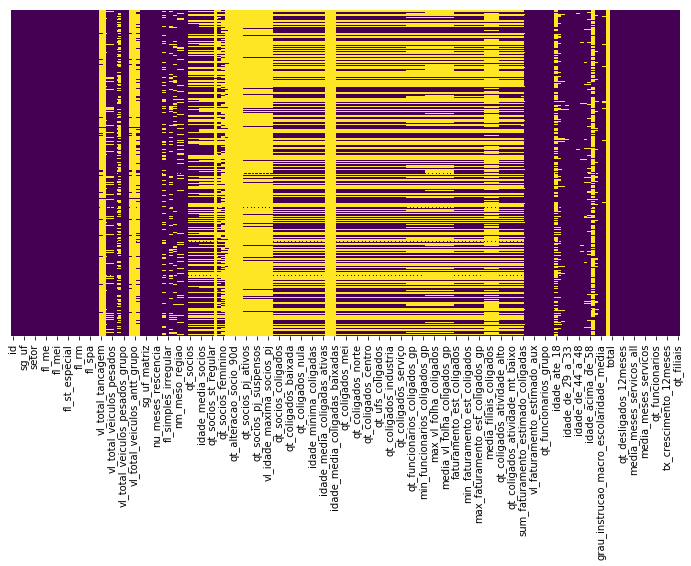

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

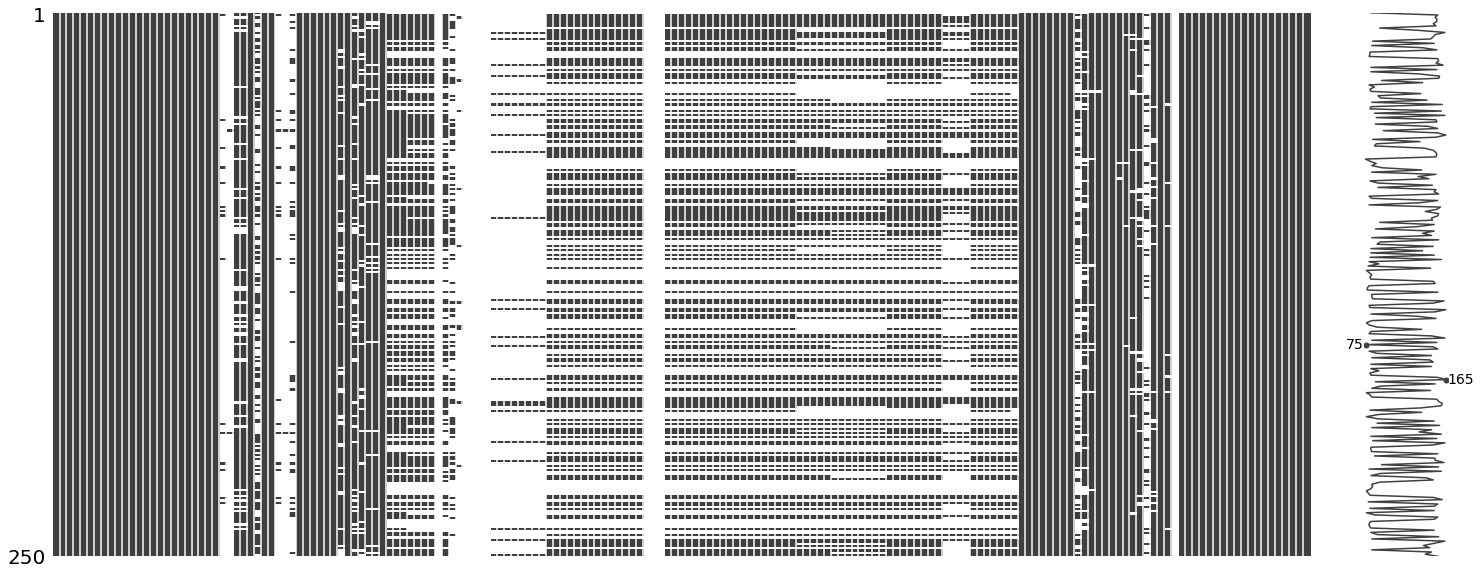

In [18]:
msno.matrix(df.sample(250))

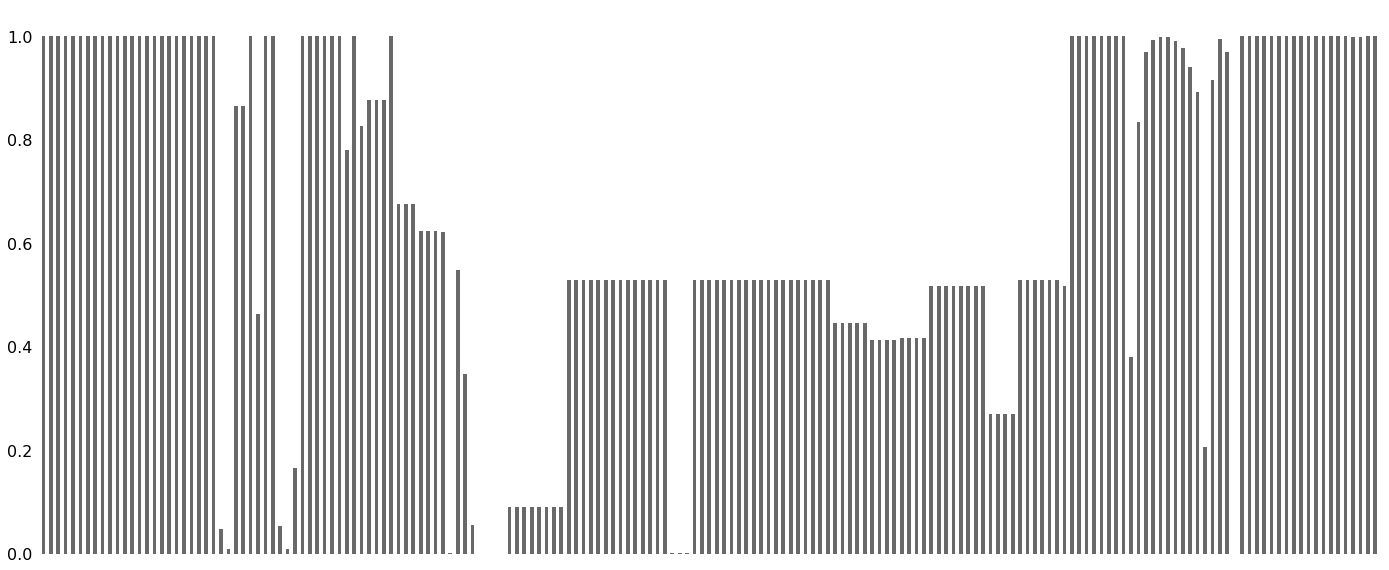

In [19]:
msno.bar(df)

In [20]:
# checkin what is numerical features
num_feat = df.select_dtypes(include=[np.number])
num_feat.columns

Index(['idade_empresa_anos', 'vl_total_tancagem', 'vl_total_veiculos_antt',
       'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art',
       'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo',
       'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo',
       ...
       'media_meses_servicos', 'max_meses_servicos', 'min_meses_servicos',
       'qt_funcionarios', 'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais'],
      dtype='object', length=145)

In [21]:
# checkin what is categorical features
cat_feat = df.select_dtypes(include=[np.object])
cat_feat.columns

Index(['id', 'de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro',
       'de_ramo', 'setor', 'idade_emp_cat', 'dt_situacao', 'fl_rm',
       'nm_divisao', 'nm_segmento', 'sg_uf_matriz', 'de_saude_tributaria',
       'de_saude_rescencia', 'de_nivel_atividade', 'de_indicador_telefone',
       'nm_meso_regiao', 'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo'],
      dtype='object')

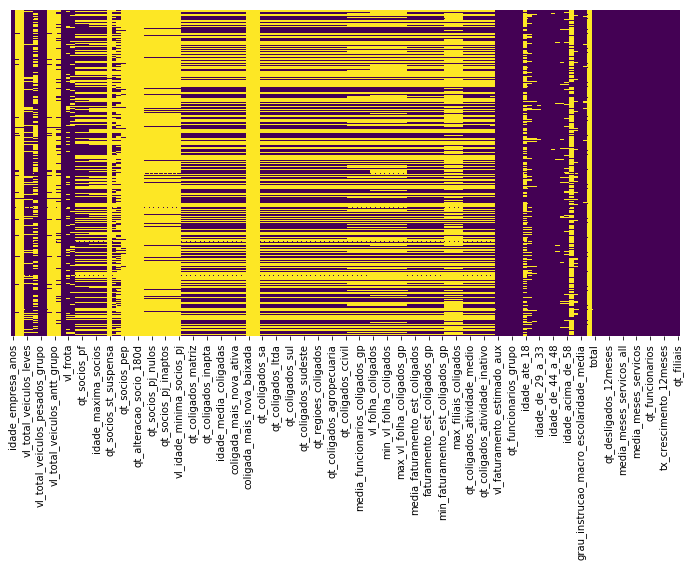

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(num_feat.isnull(),yticklabels=False,cbar=False,cmap='viridis')

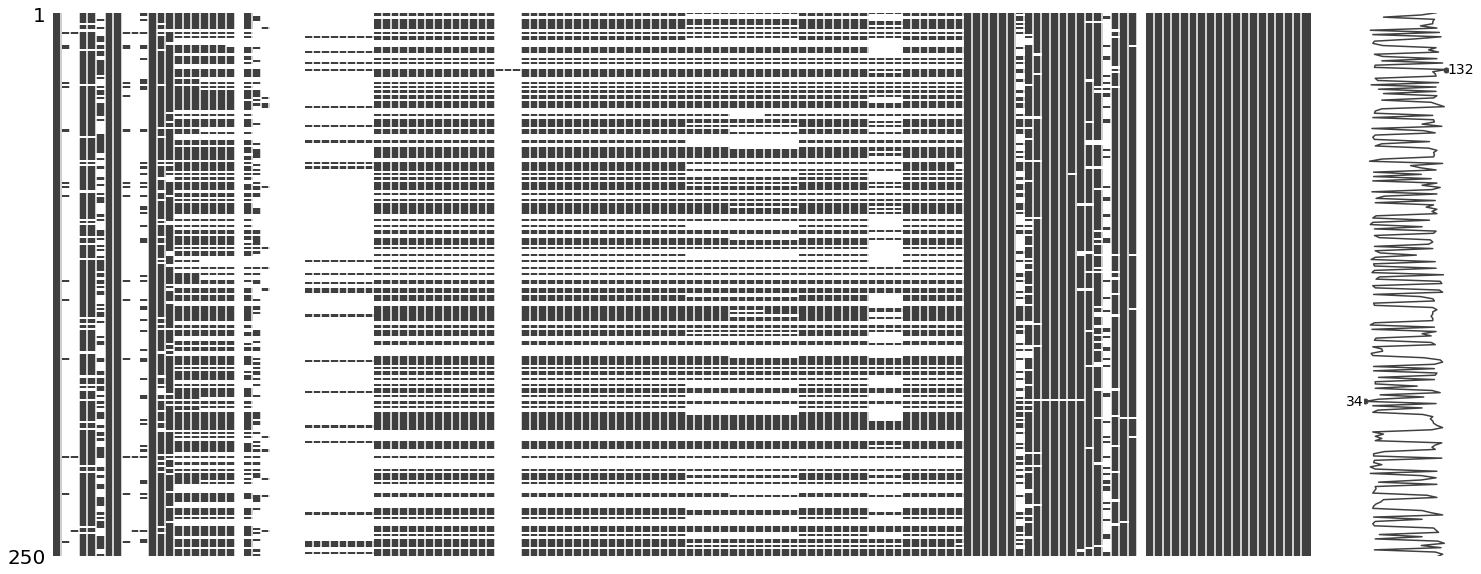

In [23]:
msno.matrix(num_feat.sample(250))

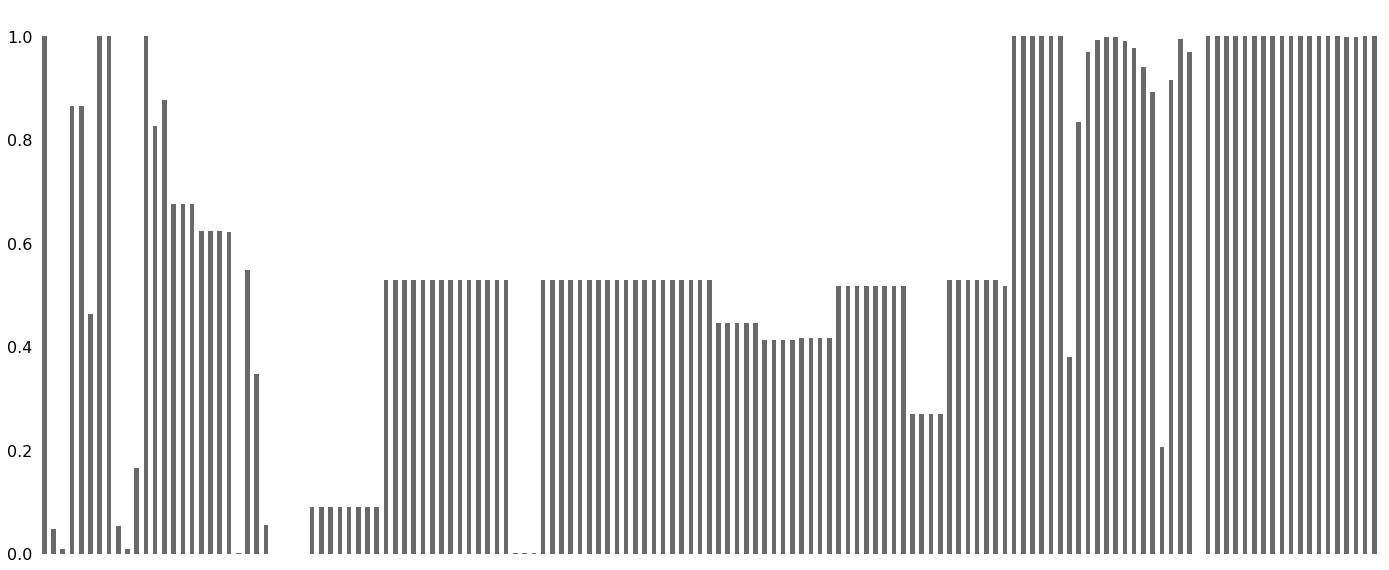

In [24]:
msno.bar(num_feat)

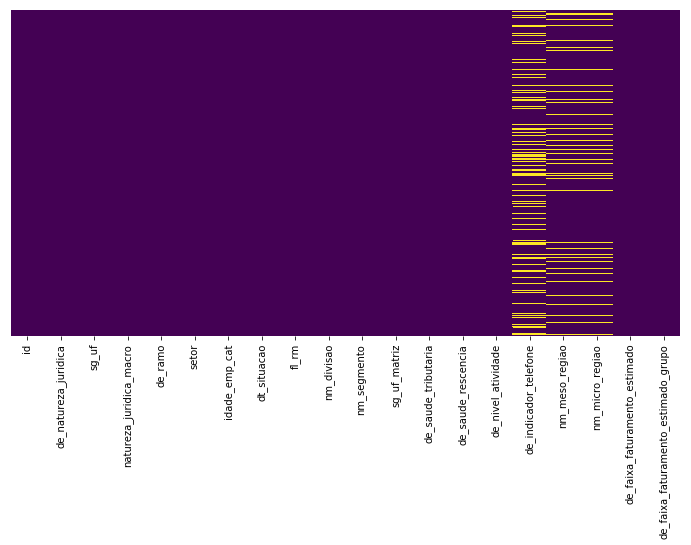

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(cat_feat.isnull(),yticklabels=False,cbar=False,cmap='viridis')

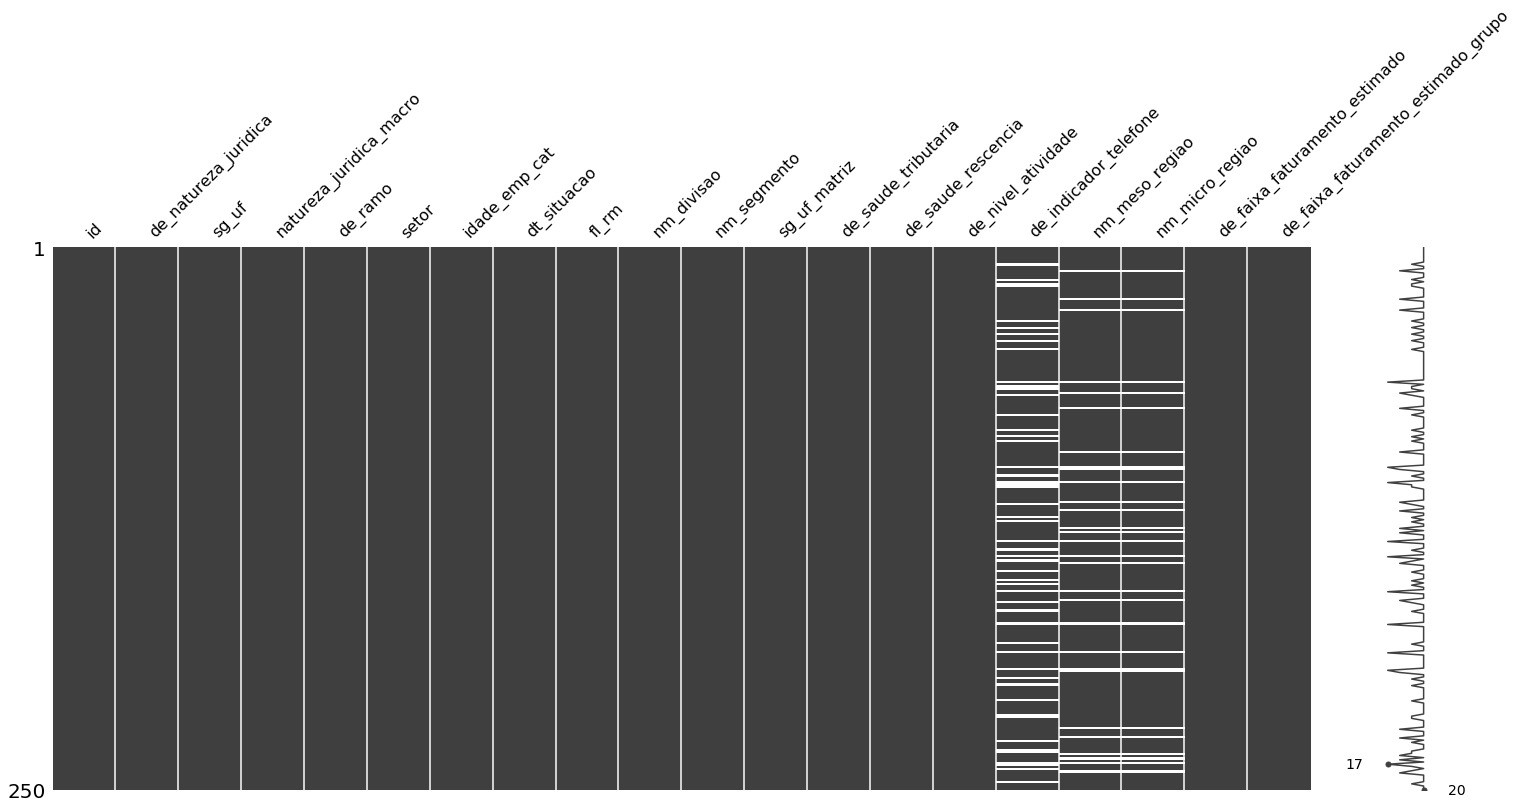

In [26]:
msno.matrix(cat_feat.sample(250))

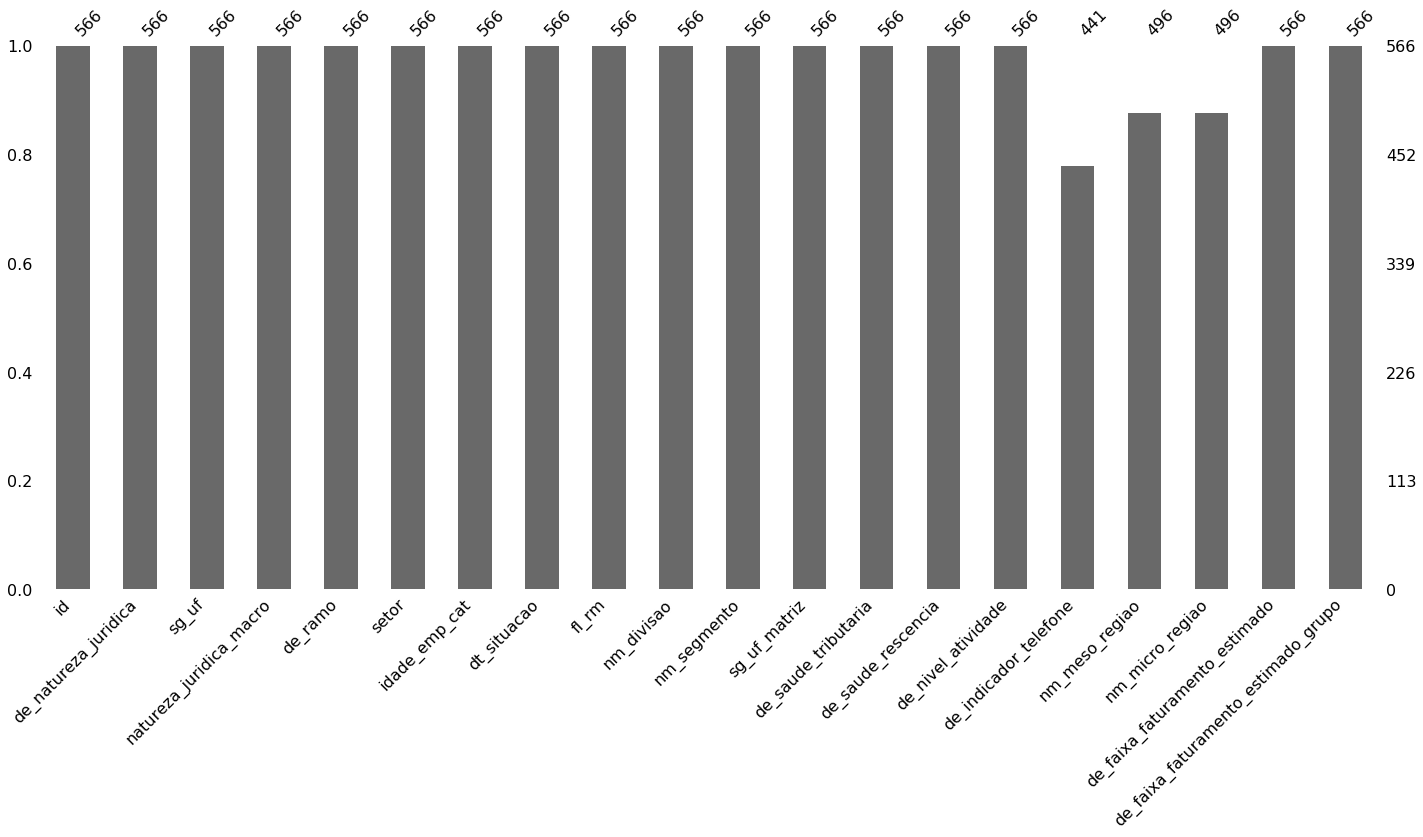

In [27]:
msno.bar(cat_feat)

# Avaliação de contexto

In [28]:
df.de_ramo.unique()

array(['ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL',
       'SERVICOS DE EDUCACAO', 'PRODUTOS DE AGROPECUARIA',
       'SERVICOS ADMINISTRATIVOS', 'COMERCIO POR ATACADO',
       'COMERCIO VAREJISTA', 'INDUSTRIA DA CONSTRUCAO',
       'SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS',
       'QUIMICA-PETROQUIMICA', 'SERVICOS DE SANEAMENTO BASICO',
       'COMERCIO E REPARACAO DE VEICULOS',
       'SERVICOS DE ALOJAMENTO/ALIMENTACAO',
       'TRANSPORTE, ARMAZENAGEM E CORREIO', 'SERVICOS DE SAUDE',
       'TELECOM', 'SERVICOS DIVERSOS', 'BENS DE CONSUMO',
       'SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE',
       'INDUSTRIA AUTOMOTIVA', 'PAPEL E CELULOSE', 'ELETROELETRONICOS',
       'INDUSTRIA DIGITAL', 'SIDERURGICA-METALURGIA',
       'INDUSTRIAS EXTRATIVAS', 'ATIVIDADES IMOBILIARIAS',
       'ELETRICIDADE E GAS', 'TEXTEIS', 'SERVICOS FINANCEIROS',
       'CULTURA, ESPORTE E RECREACAO'], dtype=object)

In [29]:
df.setor.unique()

array(['SERVIÇO', 'AGROPECUARIA', 'COMERCIO', 'CONSTRUÇÃO CIVIL',
       'INDUSTRIA'], dtype=object)

In [30]:
setores = pd.DataFrame(df.groupby('setor').id.count())
setores

,id
setor,
AGROPECUARIA,8
COMERCIO,107
CONSTRUÇÃO CIVIL,46
INDUSTRIA,69
SERVIÇO,336


In [31]:
sns.bar(setores)

AttributeError: module 'seaborn' has no attribute 'bar'

In [32]:
df.groupby(['setor','de_natureza_juridica']).id.count().to_frame()

id
setor            de_natureza_juridica                                   
AGROPECUARIA     EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA...    1
                 EMPRESARIO INDIVIDUAL                                 1
                 SOCIEDADE EMPRESARIA LIMITADA                         6
COMERCIO         EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA...    9
                 EMPRESARIO INDIVIDUAL                                 1
                 SOCIEDADE ANONIMA FECHADA                             2
                 SOCIEDADE EMPRESARIA LIMITADA                        95
CONSTRUÇÃO CIVIL EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA...    5
                 SOCIEDADE EMPRESARIA LIMITADA                        41
INDUSTRIA        EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA...    1
                 EMPRESARIO INDIVIDUAL                                 2
                 SOCIEDADE ANONIMA ABERTA                              1
                 SOCIEDADE ANONIMA FECHADA                            15
                 SOCIEDADE EMPRESARIA LIMITADA                        50
SERVIÇO          ASSOCIACAO PRIVADA                                   21
                 AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL             6
                 AUTARQUIA FEDERAL                                     2
                 AUTARQUIA MUNICIPAL                                   3
                 CONDOMINIO EDILICIO                                   2
                 COOPERATIVA                                           4
                 EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA...   15
                 EMPRESARIO INDIVIDUAL                                 6
                 ENTIDADE SINDICAL                                     3
                 FUNDACAO PRIVADA                                      2
                 FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL             1
                 FUNDO PUBLICO                                         6
                 MUNICIPIO                                           110
                 ORGANIZACAO RELIGIOSA                                 1
                 ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO...   19
                 ORGAO PUBLICO DO PODER EXECUTIVO FEDERAL              1
                 ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL           12
                 ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL             1
                 ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU ...    3
                 ORGAO PUBLICO DO PODER LEGISLATIVO MUNICIPAL          3
                 SERVICO SOCIAL AUTONOMO                               6
                 SOCIEDADE ANONIMA ABERTA                              2
                 SOCIEDADE ANONIMA FECHADA                             4
                 SOCIEDADE DE ECONOMIA MISTA                           2
                 SOCIEDADE EMPRESARIA LIMITADA                        95
                 SOCIEDADE SIMPLES LIMITADA                            6

In [33]:
df.idade_emp_cat.unique()

array(['10 a 15', '> 20', '15 a 20'], dtype=object)

In [34]:
df.idade_empresa_anos.head(10)

0    11.243836
1    43.789041
2    16.389041
3    39.671233
4    20.268493
5    20.030137
6    18.906849
7    21.947945
8    19.610959
9    43.854795
Name: idade_empresa_anos, dtype: float64

In [35]:
df.idade_empresa_anos.mean()

26.98769059489812

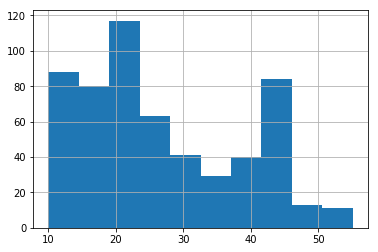

In [36]:
df.idade_empresa_anos.hist()

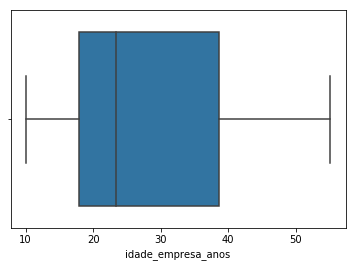

In [37]:
sns.boxplot(df.idade_empresa_anos)

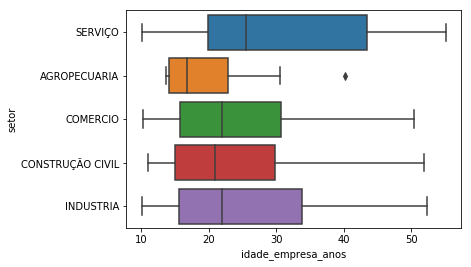

In [38]:
sns.boxplot(x='idade_empresa_anos', y='setor', data=df)